# Part I: Covariance and Correlation

## Correlation and Covariance


**Correlation**, which always takes values between -1 and 1, describes the strength of the linear relationship between two variables. The correlation coefficient is usually denoted by **`R`**.

Two or more variables can vary with each other. This is called **covariance**. Covariance is a measure of the joint variability of two variables. 
Covariance measures how two variables vary in tandem from their means.
The sign of covariance shows the tendency in the linear relationship between the variables.
- **Positive correlation**: as one variable increases, the other variable also increases. (Low variable x associated with low variable y; high variable x associated with high variable y.)
- **Negative correlation**: as one variable increases, the other variable decreases. (Low variable x associated with high variable y; high variable x associated with low variable y) 

However, the magnitude of the covariance is not easily interpretable. **Correlation coefficient** is used as a measure of covariance. 

As seen in the set of images below:
- If the linear relationship is strong and negative, the correlation coefficient R will be near -1, but never less than -1.
- If there is no apparent linear relationship, the correlation coefficient R will be near 0.
- If the linear relationship is strong and positive, the correlation coefficient R will be near +1, but never greater than +1.


![Correlation](https://spss-tutorials.com/img/correlation-coefficient-perfect-linear-relations.png "Correlation") ([SigmaPlus Consulting (2018)](https://www.spss-tutorials.com/pearson-correlation-coefficient/))


The correlation coefficient indicates the strength of a linear relationship between two variables but it does not provide any insights into other characteristics of these relationships. 



#### Covariance: Example



For example, let's say we work for an e-commerce company, and they are interested in finding a correlation between page speed (how fast each web page renders for a customer) and how much a customer spends.

numpy offers covariance methods, but we'll do it the "hard way" to show what happens under the hood. Basically we treat each variable as a vector of deviations from the mean, and compute the "dot product" of both vectors. Geometrically this can be thought of as the angle between the two vectors in a high-dimensional space, but you can just think of it as a measure of similarity between the two variables.

First, let's just make page speed and purchase amount totally random and independent of each other; a very small covariance will result as there is no real correlation:

In [42]:
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

-0.3013963645720635

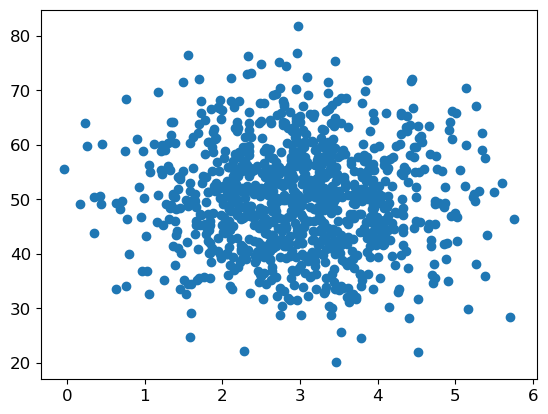

In [43]:
%matplotlib inline
from numpy import random
random.seed(0)
import numpy as np
from pylab import * #PyLab is a convenience module that bulk imports matplotlib.pyplot 
                    #(for plotting) and NumPy (for Mathematics and working with arrays) 
                    #in a single name space.

def de_mean(x):
    result = np.mean(x)
    return [xi - result for xi in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y))/ (n-1)

pageSpeeds = np.random.normal(3,1,1000)#add the required arguments
purchaseAmount = np.random.normal(50,10,1000)#add the required arguments

scatter(pageSpeeds, purchaseAmount)#to plot data points on horizontal and vertical axis in the attempt to show 
                                   #how much one variable is affected by another.
#print(np.cov(pageSpeeds, purchaseAmount))#cov(a,a)  cov(a,b),cov(b,a)  cov(b,b)
covariance(pageSpeeds, purchaseAmount)#add the required function to plot the following
#pageSpeeds
#purchaseAmount

Now we'll make our fabricated purchase amounts an actual function of page speed, making a very real correlation. The negative value indicates an inverse relationship; pages that render in less time result in more money spent:

But, what does this value mean? Covariance is sensitive to the units used in the variables, which makes it difficult to interpret. Correlation normalizes everything by their standard deviations, giving you an easier to understand value that ranges from -1 (for a perfect inverse correlation) to 1 (for a perfect positive correlation):

In [44]:
def correlation(x, y):# develop the following function
    a=x.std()
    b=y.std()
    return covariance(x,y) / a / b

correlation(pageSpeeds, purchaseAmount)

-0.03153981477568806

numpy can do all this for you with numpy.corrcoef. It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [45]:
corr = np.corrcoef(pageSpeeds, purchaseAmount)#add the required function
corr

array([[ 1.        , -0.03150827],
       [-0.03150827,  1.        ]])

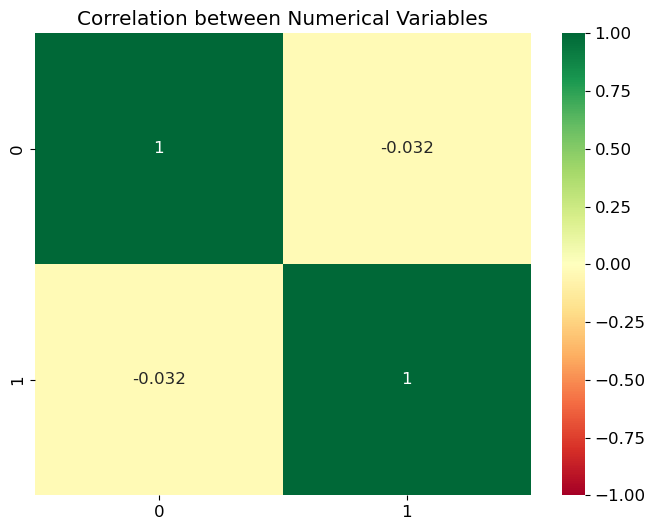

In [46]:
corr = np.corrcoef(pageSpeeds, purchaseAmount)

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)# add the function to plot the following heatmap
plt.title('Correlation between Numerical Variables');

-5.712329776409142

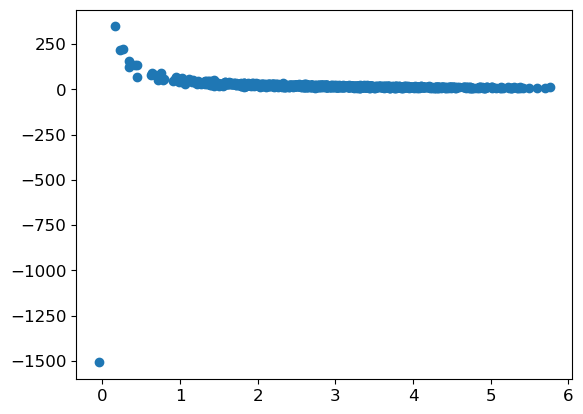

In [47]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)
#purchaseAmount            

In [48]:
corr = np.corrcoef(pageSpeeds, purchaseAmount)
corr

array([[ 1.        , -0.11196123],
       [-0.11196123,  1.        ]])

(It doesn't match exactly just due to the math precision available on a computer.)

We can force a perfect correlation by fabricating a totally linear relationship (again, it's not exactly -1 just due to precision errors, but it's close enough to tell us there's a really good correlation here):

-1.0010010010010009

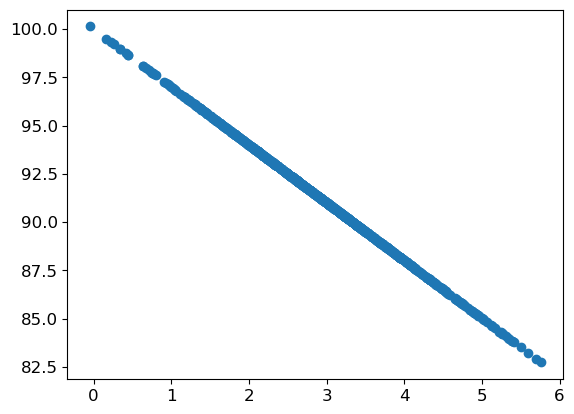

In [49]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation (pageSpeeds, purchaseAmount)


In [50]:
corr = np.corrcoef(pageSpeeds, purchaseAmount)
corr

array([[ 1., -1.],
       [-1.,  1.]])

Remember, correlation does not imply causality!

Pandas can also do all this for you with pandas.corr(). It returns a matrix of the correlation coefficients between every combination of the arrays passed in:

In [51]:
#using pandas dataframes, converting numpy arryes into pandas datafremes

import pandas as pd
df1 = pd.DataFrame(data=pageSpeeds,columns=["pageSpeeds"])
df2 = pd.DataFrame(data=purchaseAmount,columns=["purchaseAmount"])

df1 = df1.join(df2["purchaseAmount"])
df1.corr()
#df1

,pageSpeeds,purchaseAmount
pageSpeeds,1.0,-1.0
purchaseAmount,-1.0,1.0


In [52]:

df1["pageSpeeds"].corr(df2["purchaseAmount"])
# df1["pageSpeeds"].corr(df1["pageSpeeds"])


-0.9999999999999999

**Correlation**, which always takes values between -1 and 1, describes the strength of the linear relationship between two variables. The correlation coefficient is usually denoted by **`R`**.

# Part II: Conditional Probability Activity


Below is some code to create some fake data on how much stuff people purchase given their age range.

It generates 100,000 random "people" and randomly assigns them as being in their 20's, 30's, 40's, 50's, 60's, or 70's.

It then assigns a lower probability for young people to buy stuff.

In the end, we have two Python dictionaries:

"totals" contains the total number of people in each age group.
"purchases" contains the total number of items purchased by people in each age group.
The grand total of purchases is in totalPurchases, and we know the total number of people is 100,000.

Let's run it and have a look:

In [53]:

from numpy import random
random.seed(0) # The purpose of this line is to make sure that we get consistent results every time we run this code

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0} # keeping track of how many total people I have in each age range
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0} # how many purchases were made by each person in those age ranges
totalPurchases = 0      # keep track of the total number of purchases regardless of age
for _ in range(100000): # create a loop to iterate through one hundred thousand random people. Underscores is just a placeholder
    ageDecade = random.choice([20, 30, 40, 50, 60, 70]) # random.choice will just randomly pick a value out of this list so we pass in.
    purchaseProbability = float(ageDecade) / 100.0  # Compute a purchase probability. 
    totals[ageDecade] += 1 # we've generated to a new random person within this age range
    if (random.random() < purchaseProbability): # if random.random is less than that purchase probability to actually attribute a purchase to this person.
        totalPurchases += 1 # add one to total purchases
        purchases[ageDecade] += 1 # increment by one the purchases in that group age.

In [54]:
totals

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}

In [55]:
total = totals.values()
total_popolation = sum(total)
total_popolation

dict_values([16576, 16619, 16632, 16805, 16664, 16704])

We would expect the totals for each age range to be roughly consistent and they are. So we have about 16 and a half thousand people in each age decade.
A nice even age distribution that's what we expect.

In [56]:
purchases

{20: 3392, 30: 4974, 40: 6670, 50: 8319, 60: 9944, 70: 11713}

In [57]:
totalPurchases

45012

But if we look at the purchases attributed to each age range you can see that that is increasing based on age. So we have that dependency that we tried to model in there working nicely.

In [58]:
# You may use pandas to manupolate your data
import pandas as df
data= df.DataFrame({'subtotal':df.Series(totals),'purchases':df.Series(purchases)})
#data

In [59]:
total_purchased_items = data['purchases'].sum()
total_purchased_items

45012

In [60]:
all_total= data['subtotal'].sum()
all_total

100000

In [61]:
data.index = data.index.rename('Ages')
data["P(purchases given ages)"]= data["purchases"]/ data["subtotal"]# P(A/B)
# PF: probability (percentage) of  selecting a buyer from a cetain age  among all the population
PF = data["subtotal"] /100000.0 
data["P(bein a certain age)"]= PF # P(subtotal/100000),PF is just the probability of being a cetian age in this data set:
#P_EF = P(E,F) would be the probability of both being in certain generation (30's for ex.) and buying something,
# out of the total population
P_EF= data["purchases"] /100000.0 
data["P(certain Ages, Purchase)"]= P_EF
data

,subtotal,purchases,P(purchases given ages),P(bein a certain age),"P(certain Ages, Purchase)"
Ages,,,,,
20,16576,3392,0.204633,0.16576,0.03392
30,16619,4974,0.299296,0.16619,0.04974
40,16632,6670,0.401034,0.16632,0.06670
50,16805,8319,0.495031,0.16805,0.08319
60,16664,9944,0.596735,0.16664,0.09944
70,16704,11713,0.701209,0.16704,0.11713


Let's play with conditional probability.

First let's compute P(E|F), where E is "purchase" and F is "you're in your 30's". The probability of someone in their 30's buying something is just the percentage of how many 30-year-olds bought something:</br>
**Note**: We can calculate it using the given formula as you will see later.

In [62]:
PEF = float(purchases[30]) / float(totals[30]) # P(E|F)= percentage of buyers among 30s generation
print('P(purchase | 30s): ' + str(PEF))

P(purchase | 30s): 0.29929598652145134


P(F) is just the probability of being 30 in this data set:

In [63]:
PF = float(totals[30]) / 100000.0 #  probability (percentage) of buyers(30s) among all the population
print("P(30's): " +  str(PF))

P(30's): 0.16619


And P(E) is the overall probability of buying something, regardless of your age:

In [64]:
PE = float(totalPurchases) / 100000.0  # probability of total purchases
print("P(Purchase):" + str(PE))

P(Purchase):0.45012


If E and F were independent, then we would expect P(E | F) to be about the same as P(E). But they're not; P(E) is 0.45, and P(E|F) is 0.3. So, that tells us that E and F are dependent (which we know they are in this example.)

P(E,F) is different from P(E|F). P(E,F) would be the probability of both being in your 30's and buying something, out of the total population - not just the population of people in their 30's:

In [65]:
print("P(30's, Purchase)" + str(float(purchases[30]) / 100000.0))

P(30's, Purchase)0.04974


Let's also compute the product of P(E) and P(F), P(E)P(F):

In [66]:
print("P(30's)P(Purchase)" + str(PE * PF))

P(30's)P(Purchase)0.07480544280000001


Something you may learn in stats is that P(E,F) = P(E)P(F), but this assumes E and F are independent. We've found here that P(E,F) is about 0.05, while P(E)P(F) is about 0.075. So when E and F are dependent - and we have a conditional probability going on - we can't just say that P(E,F) = P(E)P(F).

We can also check that P(E|F) = P(E,F)/P(F), which is the relationship we showed in the slides - and sure enough, it is:

In [67]:
print((purchases[30] / 100000.0) / PF) # PF= totals[30] / 100000.0 

0.29929598652145134


#Your Job

Modify the code above such that the purchase probability does NOT vary with age, making E and F actually independent.

Then, confirm that P(E|F) is about the same as P(E), showing that the conditional probability of purchase for a given age is not any different than the a-priori probability of purchase regardless of age.

# Conditional Probability Solution

First we'll modify the code to have some fixed purchase probability regardless of age, say 40%:

In [69]:
from numpy import random
random.seed(0)

totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0
for _ in range(100000):
    ageDecade = random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = 0.4
    totals[ageDecade] += 1
    if (random.random() < purchaseProbability):
        totalPurchases += 1
        purchases[ageDecade] += 1

Next we will compute P(E|F) for some age group, let's pick 30 year olds again:

In [70]:
totals

{20: 16576, 30: 16619, 40: 16632, 50: 16805, 60: 16664, 70: 16704}

In [71]:
purchases

{20: 6710, 30: 6627, 40: 6670, 50: 6665, 60: 6638, 70: 6720}

In [72]:
PEF = float(purchases[30]) / float(totals[30])
print('P(purchase | 30s): ' + str(PEF))

P(purchase | 30s): 0.3987604549010169


In [73]:
PEF = float(purchases[40]) / float(totals[40])
print('P(purchase | 40s): ' + str(PEF))

P(purchase | 40s): 0.401034151034151


Now we'll compute P(E)

In [74]:
PE = float(totalPurchases) / 100000.0
print("P(Purchase):" + str(PE))

P(Purchase):0.4003


Is P(E|F) pretty  close to P(E)? What can we say about E and F?

Solution:
